In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV

In [2]:
data = pd.read_csv("used_cars.xls")

In [3]:
data.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,NaN,0,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,NaN,0,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,1,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,0,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,0,Yes


In [4]:
data.tail()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,accidents_reported,insurance_valid
9995,1996,15.25,1500,Petrol,2,5498.71,Hyundai,Manual,Silver,NaN,0,Yes
9996,1997,14.45,5000,Diesel,1,9588.31,Honda,Manual,Gray,Full,0,Yes
9997,2002,19.41,1000,Diesel,4,4557.10,Kia,Manual,Black,Full,0,Yes
9998,2005,12.95,4000,Petrol,5,7413.59,BMW,Automatic,Blue,Full,0,Yes
9999,2007,18.81,5000,Petrol,1,11634.09,BMW,Automatic,Silver,Full,0,Yes


<Axes: xlabel='engine_cc', ylabel='Count'>

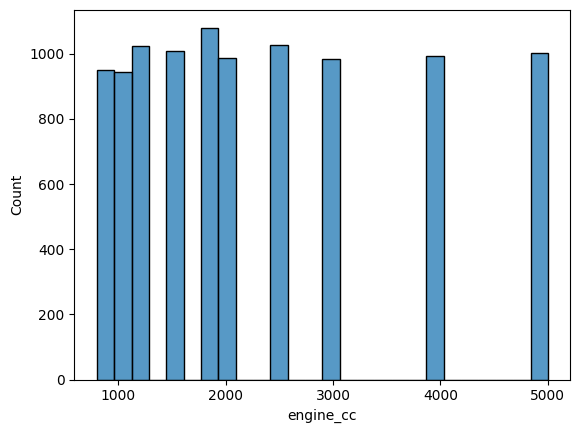

In [5]:
sns.histplot(x=data['engine_cc'])

In [6]:
data.shape

(10000, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   make_year           10000 non-null  int64  
 1   mileage_kmpl        10000 non-null  float64
 2   engine_cc           10000 non-null  int64  
 3   fuel_type           10000 non-null  object 
 4   owner_count         10000 non-null  int64  
 5   price_usd           10000 non-null  float64
 6   brand               10000 non-null  object 
 7   transmission        10000 non-null  object 
 8   color               10000 non-null  object 
 9   service_history     7962 non-null   object 
 10  accidents_reported  10000 non-null  int64  
 11  insurance_valid     10000 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 937.6+ KB


In [8]:
cont_vars = ['mileage_kmpl','engine_cc','owner_count','accidents_reported']
cat_vars = ['fuel_type','brand','transmission','color','service_history','insurance_valid']

### Missing values

In [9]:
data.isnull().sum()

make_year                0
mileage_kmpl             0
engine_cc                0
fuel_type                0
owner_count              0
price_usd                0
brand                    0
transmission             0
color                    0
service_history       2038
accidents_reported       0
insurance_valid          0
dtype: int64

In [10]:
data['service_history'].value_counts()

service_history
Full       4987
Partial    2975
Name: count, dtype: int64

In [11]:
data['service_history'].fillna(data['service_history'].mode()[0], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_27100\862835138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['service_history'].fillna(data['service_history'].mode()[0], inplace=True)


In [12]:
data.isnull().sum()

make_year             0
mileage_kmpl          0
engine_cc             0
fuel_type             0
owner_count           0
price_usd             0
brand                 0
transmission          0
color                 0
service_history       0
accidents_reported    0
insurance_valid       0
dtype: int64

In [13]:
cat_vars = ['fuel_type','brand','transmission','color','service_history','insurance_valid']

for i in cat_vars:
    print('\n')
    print(data[i].value_counts())



fuel_type
Petrol      4968
Diesel      4058
Electric     974
Name: count, dtype: int64


brand
Nissan        1089
Volkswagen    1033
BMW           1021
Tesla         1006
Honda         1003
Chevrolet      999
Hyundai        989
Toyota         956
Kia            955
Ford           949
Name: count, dtype: int64


transmission
Manual       5985
Automatic    4015
Name: count, dtype: int64


color
Gray      1705
Black     1702
Red       1678
White     1651
Blue      1634
Silver    1630
Name: count, dtype: int64


service_history
Full       7025
Partial    2975
Name: count, dtype: int64


insurance_valid
Yes    7934
No     2066
Name: count, dtype: int64


### Target variable

<Axes: xlabel='price_usd', ylabel='Count'>

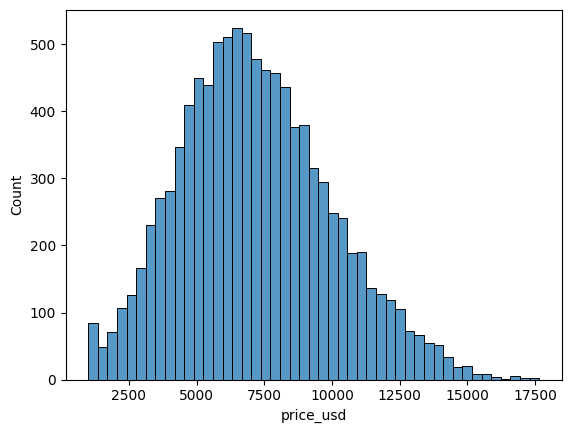

In [14]:
sns.histplot(x=data['price_usd'])

In [15]:
data['price_usd'].max()

np.float64(17647.63)

### Correlation

In [16]:
data[['mileage_kmpl','engine_cc','owner_count','accidents_reported','price_usd']].corr()

,mileage_kmpl,engine_cc,owner_count,accidents_reported,price_usd
mileage_kmpl,1.000000,-0.003222,-0.008310,0.004567,0.211971
engine_cc,-0.003222,1.000000,-0.000358,-0.007750,0.678161
owner_count,-0.008310,-0.000358,1.000000,-0.009365,-0.262266
accidents_reported,0.004567,-0.007750,-0.009365,1.000000,-0.001461
price_usd,0.211971,0.678161,-0.262266,-0.001461,1.000000


## Drop columns

In [17]:
data  = data.drop(['accidents_reported'], axis=1)

In [18]:
data.head()

,make_year,mileage_kmpl,engine_cc,fuel_type,owner_count,price_usd,brand,transmission,color,service_history,insurance_valid
0,2001,8.17,4000,Petrol,4,8587.64,Chevrolet,Manual,White,Full,No
1,2014,17.59,1500,Petrol,4,5943.50,Honda,Manual,Black,Full,Yes
2,2023,18.09,2500,Diesel,5,9273.58,BMW,Automatic,Black,Full,Yes
3,2009,11.28,800,Petrol,1,6836.24,Hyundai,Manual,Blue,Full,Yes
4,2005,12.23,1000,Petrol,2,4625.79,Nissan,Automatic,Red,Full,Yes


## Encoding variables

In [19]:
data = pd.get_dummies(data)

In [20]:
data.shape

(10000, 30)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   make_year                10000 non-null  int64  
 1   mileage_kmpl             10000 non-null  float64
 2   engine_cc                10000 non-null  int64  
 3   owner_count              10000 non-null  int64  
 4   price_usd                10000 non-null  float64
 5   fuel_type_Diesel         10000 non-null  bool   
 6   fuel_type_Electric       10000 non-null  bool   
 7   fuel_type_Petrol         10000 non-null  bool   
 8   brand_BMW                10000 non-null  bool   
 9   brand_Chevrolet          10000 non-null  bool   
 10  brand_Ford               10000 non-null  bool   
 11  brand_Honda              10000 non-null  bool   
 12  brand_Hyundai            10000 non-null  bool   
 13  brand_Kia                10000 non-null  bool   
 14  brand_Nissan           

## Split data

In [22]:
X = data.drop('price_usd',axis = 1)
y = data['price_usd']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25, random_state = 123)

In [24]:
def model_acc(model):
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    print(f"Accuracy: {acc:.4f}")
    print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}\n")

In [25]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
bc = BaggingRegressor()
ada = AdaBoostRegressor()
rf = RandomForestRegressor()
svr = SVR()

models = {
    'Linear Regression': lr,
    'Decision Tree': dt,
    'Bagging': bc,
    'AdaBoost': ada,
    'Random Forest': rf,
    'SVR': svr
}

for name, model in models.items():
    print(f"Evaluating {name}")
    model_acc(model)

Evaluating Linear Regression
Accuracy: 0.8696
MSE: 998642.69, RMSE: 999.32, R²: 0.8696

Evaluating Decision Tree
Accuracy: 0.7000
MSE: 2298016.09, RMSE: 1515.92, R²: 0.7000

Evaluating Bagging
Accuracy: 0.8336
MSE: 1274744.82, RMSE: 1129.05, R²: 0.8336

Evaluating AdaBoost
Accuracy: 0.8110
MSE: 1447839.78, RMSE: 1203.26, R²: 0.8110

Evaluating Random Forest
Accuracy: 0.8484
MSE: 1161697.19, RMSE: 1077.82, R²: 0.8484

Evaluating SVR
Accuracy: 0.2386
MSE: 5832938.46, RMSE: 2415.15, R²: 0.2386



In [26]:
param_grid = {
    'fit_intercept': [True, False],
    'n_jobs': [-1]
}

grid = GridSearchCV(
    estimator=LinearRegression(),
    param_grid=param_grid,
    cv=5,
    scoring='r2'
)

grid.fit(X_train, y_train)
best_model = grid.best_estimator_
print("Best LinearRegression Model:", best_model)
print("Best Params:", grid.best_params_)


Best LinearRegression Model: LinearRegression(n_jobs=-1)
Best Params: {'fit_intercept': True, 'n_jobs': -1}


In [31]:
import pickle
with open("predictor.pickle",'wb') as file:
    pickle.dump(best_model, file)

In [28]:
X_train.columns

Index(['make_year', 'mileage_kmpl', 'engine_cc', 'owner_count',
       'fuel_type_Diesel', 'fuel_type_Electric', 'fuel_type_Petrol',
       'brand_BMW', 'brand_Chevrolet', 'brand_Ford', 'brand_Honda',
       'brand_Hyundai', 'brand_Kia', 'brand_Nissan', 'brand_Tesla',
       'brand_Toyota', 'brand_Volkswagen', 'transmission_Automatic',
       'transmission_Manual', 'color_Black', 'color_Blue', 'color_Gray',
       'color_Red', 'color_Silver', 'color_White', 'service_history_Full',
       'service_history_Partial', 'insurance_valid_No', 'insurance_valid_Yes'],
      dtype='object')